# lawn mower path

This notebook presents the result of the infrastructure to simulate repeated opeartion cycles of the two lawn mowers.

Key achievements:  
module containing the Coverage class to repeatedly initiate a new operation, until the ratio of the area covered to  
the entire lawn area is larger than a value (defaulted to 95%).  
To keep track of the area covered by the two mowers, a (sufficiently fine) grid of the lawn is built, with every tile  
representing a patch of lawn. A patch is deemed mown whenever a mower passing close covers it entirely.

In [1]:
import numpy as np
import multiprocessing as mp
from itertools import repeat

import sys
sys.path.append('src/')

import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import src.utility as util
import src.coverage as cov
import src.plotting as plot
import src.simulator as sim

Choose a the set of segments defining the perimeter of the region and of a complex enough lawn.

In [2]:
lawn_points = [[(0,10), (15,10)], 
               [(15,10), (15,0)], 
               [(15,0), (4,0)], 
               [(4,0), (4,3)], 
               [(4,3), (7,3)], 
               [(7,3), (7,2)], 
               [(7,2), (12,2)], 
               [(12,2), (12,6)], 
               [(12,6), (3,6)], 
               [(3,6), (3,3)], 
               [(3,3), (1,3)], 
               [(1,3), (1,5)], 
               [(1,5), (0,5)], 
               [(0,5), (0,10)]
              ]

region_points = [[(0,10), (15,10)], 
                 [(15,10), (15,0)], 
                 [(15,0), (2,0)], 
                 [(2,0), (0,5)],
                 [(0,5), (0,10)]
                ]

Get lawn vertices and generate two random positions alogn its perimeter

Initialise the two mowers at the random locations and simulate one operation cycle

In [3]:
mower_size = 0.15

kwargs = {'theta_min': -3*np.pi/2, 
          'theta_max': 3*np.pi/2, 
          'unit_size': mower_size,
          'lawn_points': lawn_points,
          'region_points': region_points
         }

MW = sim.Simulator(**kwargs)

In [4]:
path_unit0 = np.asarray(MW.path_unit0)
path_unit1 = np.asarray(MW.path_unit1)

pos0_unit0 = path_unit0[0] 
pos0_unit1 = path_unit1[0]

Display the results

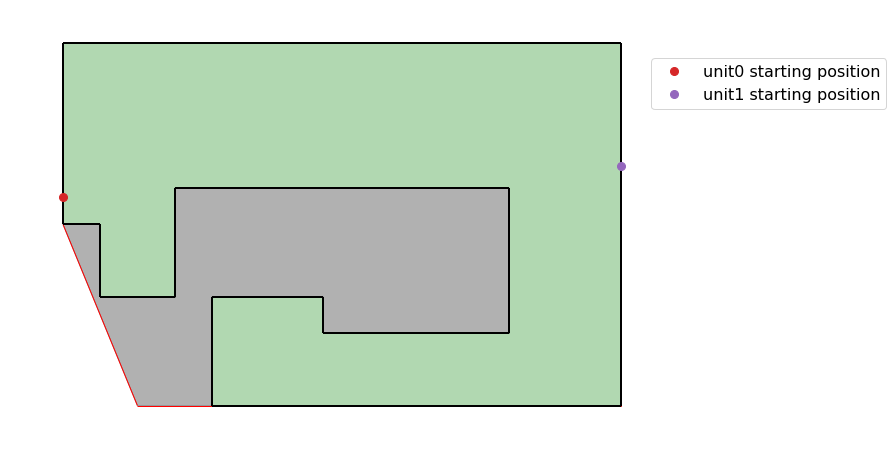

In [5]:
_, ax = plot.get_lawn_region_plot(lawn_points, region_points)

ax.plot(*pos0_unit0, 'C3o', ms=8, zorder=10, label="unit0 starting position");
ax.plot(*pos0_unit1, 'C4o', ms=8, zorder=10, label="unit1 starting position");
ax.legend(bbox_to_anchor=(0.95, 0.9), fontsize=16);
ax.plot(*path_unit0.T, 'w.', alpha=0.2);
ax.plot(*path_unit1.T, 'w.', alpha=0.2);

From the figure above we observe that the algorithm works correctly, simulating two mowers' motion across the lawn.  

We should not be fooled by the width of the lines, which is intentionally kept large for visualisation purposes.  

Now, we should estimate the surface covered by the two machines combined, being careful not to double path crossings.

In [6]:
patch_size = 0.02
D = mower_size/2 - patch_size*np.sqrt(2)/2

kwargs['patch_size'] = patch_size
kwargs['D'] = D

CV = cov.Coverage(**kwargs)

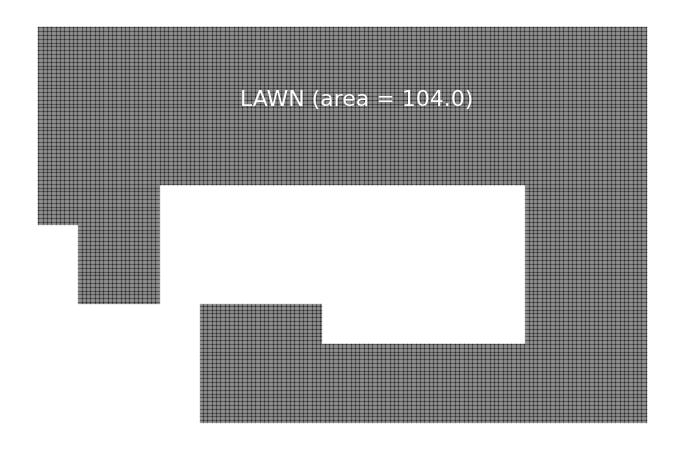

In [7]:
lawn_grid = CV.lawn_grid

x_grid, y_grid = lawn_grid.ravel(order='F').reshape(2,-1)

grid_area = len(lawn_grid) * patch_size**2

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_grid, y_grid, 'k.', ms=1, alpha=0.3);
ax.text(5, 8, f"LAWN (area = {grid_area})", color='w', fontsize=22);
ax.axis('off');

In [8]:
%time CV(verbose=True)

starting iteration 0
simulate mowers
end of iteration 0, ratio 0.1670076923076923
starting iteration 1
simulate mowers
end of iteration 1, ratio 0.3069192307692308
starting iteration 2
simulate mowers
end of iteration 2, ratio 0.40483846153846154
starting iteration 3
simulate mowers
end of iteration 3, ratio 0.46496923076923075
starting iteration 4
simulate mowers
end of iteration 4, ratio 0.5562
starting iteration 5
simulate mowers
end of iteration 5, ratio 0.6018346153846154
starting iteration 6
simulate mowers
end of iteration 6, ratio 0.6694846153846155
starting iteration 7
simulate mowers
end of iteration 7, ratio 0.711396153846154
starting iteration 8
simulate mowers
end of iteration 8, ratio 0.774946153846154
starting iteration 9
simulate mowers
end of iteration 9, ratio 0.7911923076923078
starting iteration 10
simulate mowers
end of iteration 10, ratio 0.808423076923077
starting iteration 11
simulate mowers
end of iteration 11, ratio 0.8352307692307692
starting iteration 12
sim

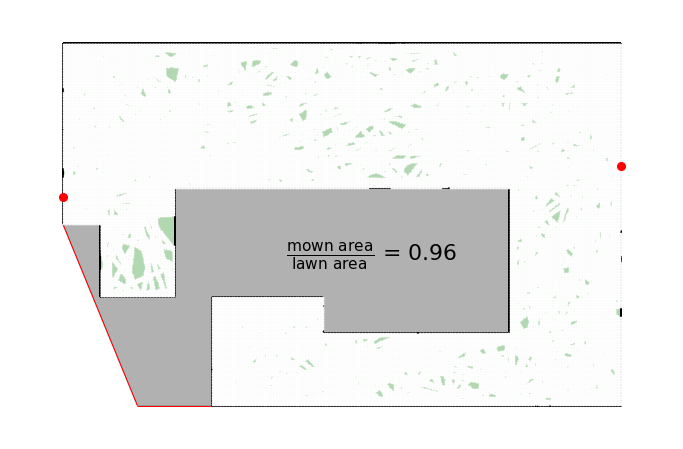

In [10]:
mown_grid = CV.mown_grid
mown_area_ratio = CV.mown_area_ratio

_, ax = plot.get_lawn_region_plot(lawn_points, region_points)

ax.plot(*pos0_unit0, 'ro', ms=8, zorder=10);
ax.plot(*pos0_unit1, 'ro', ms=8, zorder=10);

x_mown, y_mown = mown_grid.ravel(order='F').reshape(2,-1)
ax.plot(x_mown, y_mown, 'w.', ms=1);
string = r"$\frac{\mathrm{mown\,\, area}}{\mathrm{lawn\,\, area}}$"
ax.text(6, 4, "{} = {:.2f}".format(string, mown_area_ratio), fontsize=22);